# Importing Dependencies and setting device

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

# Importing MNIST dataset and data exploration

In [3]:
train_dataset = pd.read_csv("/kaggle/input/mnist-in-csv/mnist_train.csv")
test_dataset = pd.read_csv("/kaggle/input/mnist-in-csv/mnist_test.csv")

In [4]:
train_dataset

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_dataset

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


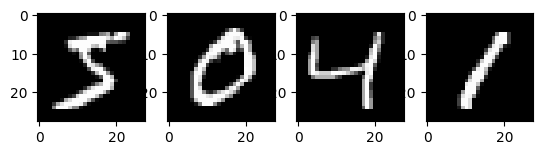

In [6]:
plt.subplot(1,4,1)
plt.imshow(train_dataset.iloc[0,1:].to_numpy().reshape(28,28) , cmap='gray')
plt.subplot(1,4,2)
plt.imshow(train_dataset.iloc[1,1:].to_numpy().reshape(28,28) , cmap='gray')
plt.subplot(1,4,3)
plt.imshow(train_dataset.iloc[2,1:].to_numpy().reshape(28,28) , cmap='gray')
plt.subplot(1,4,4)
plt.imshow(train_dataset.iloc[3,1:].to_numpy().reshape(28,28) , cmap='gray')
plt.show()

**Creating the training and testing input and output vectors**

In [7]:
x_train_df = train_dataset.iloc[:,1:]
x_train_np = x_train_df.to_numpy()
x_train_tensor = torch.tensor(x_train_np,dtype=torch.float)
x_train_tensor

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [8]:
y_train_df = train_dataset.iloc[:,0]
y_train_df_encoded = pd.get_dummies(y_train_df)*1.0
display(y_train_df_encoded)
y_train_np = y_train_df_encoded.to_numpy()
y_train_tensor = torch.tensor(y_train_np,dtype=torch.float)
y_train_tensor

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
59996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.]])

In [9]:
x_test_df = test_dataset.iloc[:,1:]
x_test_np = x_test_df.to_numpy()
x_test_tensor = torch.tensor(x_test_np,dtype=torch.float)
x_test_tensor

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [10]:
y_test_df = test_dataset.iloc[:,0]
y_test_df_encoded = pd.get_dummies(y_test_df)*1.0
display(y_test_df_encoded)
y_test_np = y_test_df_encoded.to_numpy()
y_test_tensor = torch.tensor(y_test_np,dtype=torch.float)
y_test_tensor

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


tensor([[0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

**Q] Train on MNIST dataset using an MLP. The original training dataset contains 60,000 images and test contains 10,000 images. If you are short on compute, use a stratified subset of a smaller number of images. But, the test set remains the same 10,000 images. Compare against RF and Logistic Regression models.  The metrics can be: F1-score, confusion matrix. What do you observe? What all digits are commonly confused?**

# Constructing the models

In [50]:
mlp_model = nn.Sequential(
    nn.Linear(784,1024,device=device),
    nn.ReLU(),
    nn.Linear(1024,1024,device=device),
    nn.ReLU(),
    nn.Linear(1024,10,device=device),
)

In [42]:
logistic_model = nn.Sequential(
        nn.Linear(784,10,device=device)
)

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators=25, random_state=42)
rf2 = RandomForestClassifier(n_estimators=50, random_state=42)
rf3 = RandomForestClassifier(n_estimators=75, random_state=42)
rf4 = RandomForestClassifier(n_estimators=100, random_state=42)

X_train_rf = train_dataset.iloc[:,1:]
y_train_rf = train_dataset.iloc[:,0]

rf1 = rf1.fit(X_train_rf, y_train_rf)
rf2 = rf2.fit(X_train_rf, y_train_rf)
rf3 = rf3.fit(X_train_rf, y_train_rf)
rf4 = rf4.fit(X_train_rf, y_train_rf)

In [14]:
def train_model(model,X,y,lr,num_epochs):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    X = X.to(device)
    y = y.to(device)
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr)
    train_data_pred = []
    for i in range(num_epochs):
        y_pred = model(X)
        train_data_pred.append(nn.functional.softmax(y_pred, dim=1))
        loss = loss_func(y_pred,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if i==0 or (i+1)%100 == 0:
            print('epoch',(i+1),': loss =',loss.item())
    print(f"epoch {num_epochs}: loss = {loss.item()}")
    return train_data_pred

In [15]:
def test_model(model,x_test):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    x_test = x_test.to(device)
    y_test = model(x_test)
    return y_test

# Test Metrics

In [16]:
from sklearn.metrics import accuracy_score

def accuracy(y_pred,labels):
    _,pred_labels = torch.max(y_pred,1)
    pred_labels = pred_labels.detach().to('cpu').numpy()
#     correct = (pred_labels == labels).sum().item()
#     accuracy = correct/labels.size
    accuracy_calculated = accuracy_score(labels,pred_labels)
    return accuracy_calculated

In [17]:
from sklearn.metrics import f1_score

def fscore(y_pred,labels):
    _,pred_labels = torch.max(y_pred,1)
    pred_labels = pred_labels.detach().to('cpu').numpy()
    score = f1_score(labels, pred_labels, average='weighted')
    return score

In [18]:
from sklearn.metrics import confusion_matrix

def conf_matrix(y_pred,labels):
    _,pred_labels = torch.max(y_pred,1)
    pred_labels = pred_labels.detach().to('cpu').numpy()
    cm = confusion_matrix(labels, pred_labels)
    return cm

Plotting graphs on train data

In [37]:
def plot_train_metrics(train_data_pred,train_labels=y_train_df):
    acc =[]
    fs = []
    epoch_num = [i+1 for i in range(len(train_data_pred))]
    for y_pred in train_data_pred:
        acc.append(accuracy(y_pred,train_labels))
        fs.append(fscore(y_pred,train_labels))
    plt.subplot(1,2,1)
    plt.title('Accuracy vs num of epochs on train data')
#     plt.xticks(epoch_num)
    plt.xlabel('epoch number')
    plt.ylabel('Train data accuracy')
    plt.plot(epoch_num,acc)
    plt.subplot(1,2,2)
    plt.title('F1score vs num of epochs on train data')
    plt.xlabel('epoch number')
    plt.ylabel('Train data fscore')
#     plt.xticks(epoch_num)
    plt.plot(epoch_num,fs)
    plt.tight_layout()
    plt.show()
    return 

# Training and testing the model on MNIST Dataset

**MLP MODEL**

In [51]:
train_data_pred_mlp = train_model(mlp_model,x_train_tensor,y_train_tensor,lr=0.0001,num_epochs=500)

epoch 1 : loss = 13.30284309387207
epoch 100 : loss = 0.1342594474554062
epoch 200 : loss = 0.03370457887649536
epoch 300 : loss = 0.010414030402898788
epoch 400 : loss = 0.004640935454517603
epoch 500 : loss = 0.002681305166333914
epoch 500: loss = 0.002681305166333914


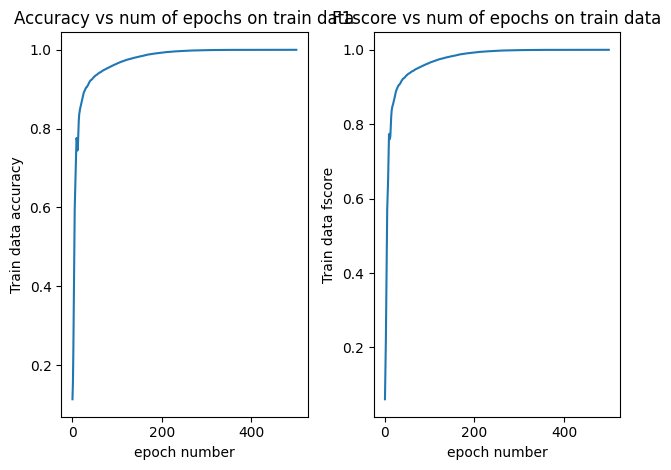

In [52]:
plot_train_metrics(train_data_pred_mlp)

In [53]:
logits = test_model(mlp_model,x_test_tensor)
labels = y_test_df
y_pred = nn.functional.softmax(logits, dim=1)
accuracy_mlp = accuracy(y_pred,labels)
f1score = fscore(y_pred,labels)
confusionMatrix = conf_matrix(y_pred,labels)
print(f"Accuracy on test data using MLP: {accuracy_mlp*100}%")
print(f"f1 score on test data using MLP: {f1score}")
print(confusionMatrix)

Accuracy on test data using MLP: 97.17%
f1 score on test data using MLP: 0.9717015201401568
[[ 964    1    2    0    1    2    4    2    3    1]
 [   0 1118    4    1    1    1    2    1    6    1]
 [   2    2 1001    7    1    0    3    7    8    1]
 [   0    0    6  979    1    8    0    4    6    6]
 [   0    0    5    1  960    0    4    0    1   11]
 [   4    0    0    7    2  863    5    1    7    3]
 [   5    2    0    1    5    4  935    1    4    1]
 [   0    3   11    4    3    2    0  994    2    9]
 [   5    0    4    5    5    4    2    3  940    6]
 [   6    3    0    8    9    4    1    9    6  963]]


**LOGISTIC REGRESSION MODEL**

In [54]:
train_data_pred = train_model(logistic_model,x_train_tensor,y_train_tensor,lr=0.0001,num_epochs=1500)

epoch 1 : loss = 73.43306732177734
epoch 100 : loss = 8.884095191955566
epoch 200 : loss = 4.479705333709717
epoch 300 : loss = 3.241311550140381
epoch 400 : loss = 2.639620780944824
epoch 500 : loss = 2.263611078262329
epoch 600 : loss = 1.9951053857803345
epoch 700 : loss = 1.7874151468276978
epoch 800 : loss = 1.618192434310913
epoch 900 : loss = 1.4747930765151978
epoch 1000 : loss = 1.3514336347579956
epoch 1100 : loss = 1.2441518306732178
epoch 1200 : loss = 1.1498969793319702
epoch 1300 : loss = 1.0656952857971191
epoch 1400 : loss = 0.9898841381072998
epoch 1500 : loss = 0.9211088418960571
epoch 1500: loss = 0.9211088418960571


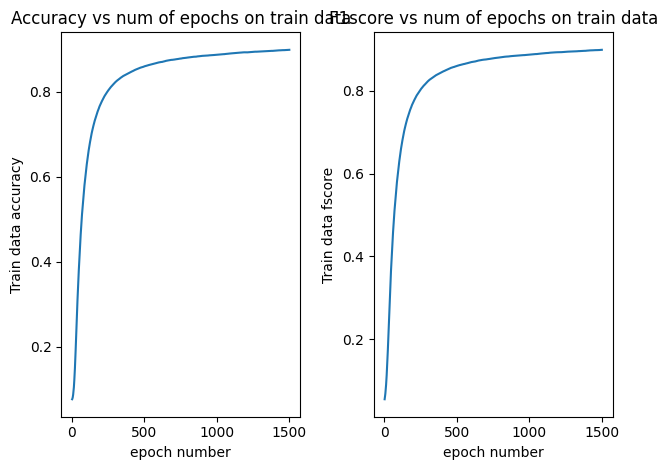

In [55]:
plot_train_metrics(train_data_pred)

In [56]:
logits_lr = test_model(logistic_model,x_test_tensor)
labels_lr = y_test_df
y_pred_lr = nn.functional.softmax(logits_lr, dim=1)
accuracy_lr = accuracy(y_pred_lr,labels_lr)
f1score_lr = fscore(y_pred_lr,labels_lr)
confusionMatrix_lr = conf_matrix(y_pred_lr,labels_lr)
print(f"Accuracy on test data using multi-class logitic regression: {accuracy_lr*100}%")
print(f"f1 score on test data using multi-class logitic regression: {f1score_lr}")
print(confusionMatrix_lr)

Accuracy on test data using multi-class logitic regression: 88.73%
f1 score on test data using multi-class logitic regression: 0.8872545349981538
[[ 938    0    4    6    2    9   11    3    5    2]
 [   0 1088   10   10    0    2    3    3   19    0]
 [   8   17  885   41    8    6   15    8   40    4]
 [  10    2   28  874    1   50    1   11   21   12]
 [   2    1    7    6  879    2   17   12   11   45]
 [  11    3    8   46   10  724   15    7   56   12]
 [  17    4   18    5   10   17  878    1    8    0]
 [   2    8   21   13    6    0    0  925    6   47]
 [  10    8   19   41   11   37   12   11  806   19]
 [   8    5    2   11   42    4    0   42   19  876]]


**RANDOM FOREST MODEL**

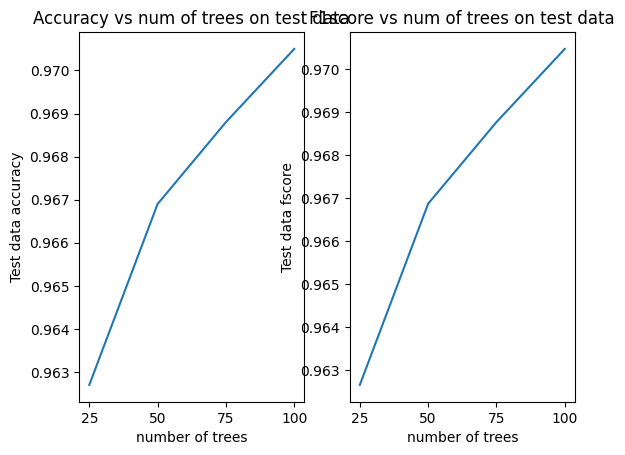

In [36]:
y_pred_rf1 = rf1.predict(x_test_df)
y_pred_rf2 = rf2.predict(x_test_df)
y_pred_rf3 = rf3.predict(x_test_df)
y_pred_rf4 = rf4.predict(x_test_df)
num_trees = [25,50,75,100]
acc = [accuracy_score(y_test_df, y_pred_rf1),accuracy_score(y_test_df, y_pred_rf2),accuracy_score(y_test_df, y_pred_rf3),accuracy_score(y_test_df, y_pred_rf4)]
fsc = [f1_score(y_test_df, y_pred_rf1,average='weighted'),f1_score(y_test_df, y_pred_rf2,average='weighted'),f1_score(y_test_df, y_pred_rf3,average='weighted'),f1_score(y_test_df, y_pred_rf4,average='weighted')]
plt.subplot(1,2,1)
plt.title('Accuracy vs num of trees on test data')
plt.xlabel('number of trees')
plt.ylabel('Test data accuracy')
plt.xticks(num_trees)
plt.plot(num_trees,acc)
plt.subplot(1,2,2)
plt.title('F1score vs num of trees on test data')
plt.xlabel('number of trees')
plt.ylabel('Test data fscore')
plt.xticks(num_trees)
plt.plot(num_trees,fsc)
plt.show()

In [27]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

y_pred_rf = rf4.predict(x_test_df)
accuracy_rf = accuracy_score(y_test_df, y_pred_rf)
f1score_rf = f1_score(y_test_df, y_pred_rf,average='weighted')
confusionMatrix_rf = confusion_matrix(y_test_df, y_pred_rf)
print(f"Accuracy on test data using random forest classifier: {accuracy_rf*100}%")
print(f"f1 score on test data using random forest classifier: {f1score_rf}")
print(confusionMatrix_rf)

Accuracy on test data using random forest classifier: 97.05%
f1 score on test data using random forest classifier: 0.9704722695987773
[[ 971    0    0    0    0    2    3    1    3    0]
 [   0 1127    2    2    0    1    2    0    1    0]
 [   6    0 1002    5    3    0    3    8    5    0]
 [   1    0    9  972    0    9    0    9    8    2]
 [   1    0    0    0  955    0    5    1    4   16]
 [   5    1    1    9    2  860    5    2    5    2]
 [   7    3    0    0    3    3  937    0    5    0]
 [   1    4   20    2    0    0    0  990    2    9]
 [   4    0    6    7    5    5    5    4  930    8]
 [   7    6    2   12   12    1    0    4    4  961]]


**Numbers wrongly classified by MLP model**

In [57]:
y_pred = y_pred.to('cpu')
_,pred_labels = torch.max(y_pred,1)
pred_labels = pred_labels.numpy()
incorrect = (pred_labels != labels)
wrongly_classified = pd.DataFrame()
wrongly_classified['Ground Truth'] = labels[incorrect == True]
wrongly_classified['Predicted label'] = pred_labels[incorrect == True]
print(f'\nWrongly Classified Data:')
display(wrongly_classified)
print('-----------------------------------------------------------------------------')
print(f"\nThe true labels and wrong labels predicted for them:")
display(wrongly_classified.groupby('Ground Truth')['Predicted label'].unique())
print('-----------------------------------------------------------------------------')
print(f"\nThe true labels and MOST COMMON wrong labels predicted for them:")
display(wrongly_classified.groupby('Ground Truth')['Predicted label'].agg(lambda x: x.mode().tolist()))
print('-----------------------------------------------------------------------------')
print("\nNumber of times the class is wrongly predicted:")
print(wrongly_classified['Ground Truth'].value_counts())
print('-----------------------------------------------------------------------------')


Wrongly Classified Data:


,Ground Truth,Predicted label
124,7,4
151,9,3
193,9,8
195,3,5
217,6,5
...,...,...
9891,9,7
9893,2,3
9944,3,8
9980,2,3


-----------------------------------------------------------------------------

The true labels and wrong labels predicted for them:


Ground Truth
0    [7, 6, 5, 8, 4, 2, 9, 1]
1    [8, 2, 3, 7, 4, 6, 5, 9]
2    [7, 8, 1, 0, 3, 6, 9, 4]
3          [5, 8, 9, 2, 7, 4]
4             [2, 9, 6, 3, 8]
5       [8, 4, 3, 9, 0, 6, 7]
6    [5, 0, 8, 4, 3, 1, 7, 9]
7       [4, 1, 2, 9, 8, 3, 5]
8    [2, 4, 7, 9, 3, 0, 5, 6]
9    [3, 8, 7, 4, 0, 5, 6, 1]
Name: Predicted label, dtype: object

-----------------------------------------------------------------------------

The true labels and MOST COMMON wrong labels predicted for them:


Ground Truth
0       [6]
1       [8]
2       [8]
3       [5]
4       [9]
5    [3, 8]
6    [0, 4]
7       [2]
8       [9]
9    [4, 7]
Name: Predicted label, dtype: object

-----------------------------------------------------------------------------

Number of times the class is wrongly predicted:
Ground Truth
9    46
7    34
8    34
3    31
2    31
5    29
6    23
4    22
1    17
0    16
Name: count, dtype: int64
-----------------------------------------------------------------------------


**Q] Let us assume your MLP has 30 neurons in first layer, 20 in second layer and then 10 finally for the output layer (corresponding to 10 classes). On the trained MLP, plot the t-SNE for the output from the layer containing 20 neurons for the 10 digits. Contrast this with the t-SNE for the same layer but for an untrained model. What do you conclude?**

In [58]:
model_given = nn.Sequential(
    nn.Linear(784,30,device=device),
    nn.ReLU(),
    nn.Linear(30,20,device=device),
    nn.ReLU(),
    nn.Linear(20,10,device=device),
)

In [59]:
def extract_second_layer_features(model, x):
    x = model[0](x)  # First Linear layer
    x = model[1](x)  # First ReLU
    second_layer_output = model[2](x)  # Second Linear layer
    second_layer_output = model[3](second_layer_output)  # Second ReLU
    return second_layer_output

In [60]:
x_test_tensor = x_test_tensor.to(device)
second_layer_features_untrained = extract_second_layer_features(model_given, x_test_tensor)
print('The shape of the second layer output:',second_layer_features_untrained.shape)
second_layer_features_untrained

The shape of the second layer output: torch.Size([10000, 20])


tensor([[ 0.0000, 16.2711,  3.7277,  ...,  7.5160,  6.1415,  0.0000],
        [ 0.0000, 19.4102, 32.4286,  ...,  0.0000, 12.8820,  0.0000],
        [ 0.4989,  7.0938, 11.9462,  ...,  4.4877,  0.0000,  5.9643],
        ...,
        [ 0.0000, 38.3546,  8.1671,  ...,  0.0000, 21.3515,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ..., 26.2093,  0.0000,  0.0000],
        [ 0.0000, 13.6266, 18.5282,  ..., 11.5537, 12.2602,  1.5440]],
       device='cuda:0', grad_fn=<ReluBackward0>)

In [61]:
train_data_pred = train_model(model_given,x_train_tensor,y_train_tensor,lr=0.0001,num_epochs=1000)

epoch 1 : loss = 25.614675521850586
epoch 100 : loss = 2.1098477840423584
epoch 200 : loss = 1.2314352989196777
epoch 300 : loss = 0.7799862623214722
epoch 400 : loss = 0.5753999948501587
epoch 500 : loss = 0.47147154808044434
epoch 600 : loss = 0.4080663025379181
epoch 700 : loss = 0.36401650309562683
epoch 800 : loss = 0.3305552005767822
epoch 900 : loss = 0.30413347482681274
epoch 1000 : loss = 0.282574862241745
epoch 1000: loss = 0.282574862241745


In [62]:
logits = test_model(mlp_model,x_test_tensor)
labels = y_test_df
y_pred = nn.functional.softmax(logits, dim=1)
accuracy_mlp = accuracy(y_pred,labels)
print(f"Accuracy on test data using MLP: {accuracy_mlp*100}%")

Accuracy on test data using MLP: 97.17%


In [63]:
x_test_tensor = x_test_tensor.to(device)
second_layer_features_trained = extract_second_layer_features(model_given, x_test_tensor)
print('The shape of the second layer output:',second_layer_features_trained.shape)
second_layer_features_trained

The shape of the second layer output: torch.Size([10000, 20])


tensor([[ 4.8100,  0.0000,  0.0000,  ..., 22.6592,  0.0000,  0.0000],
        [ 0.0000,  0.0000, 31.1692,  ...,  0.0000,  0.0000,  0.0000],
        [11.4106,  1.2120, 15.0533,  ...,  6.9688,  0.0000,  0.0000],
        ...,
        [34.0471,  0.0000,  1.1830,  ...,  2.5006,  0.0000, 14.4208],
        [ 0.0000,  0.0000,  0.0000,  ..., 33.9717,  0.0000,  0.0000],
        [ 0.0000,  0.0000, 36.3175,  ...,  0.0000,  0.0000,  0.0000]],
       device='cuda:0', grad_fn=<ReluBackward0>)

**Dimentionality Reduction using t-SNE**

In [64]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)

second_layer_tsne_untrained = tsne.fit_transform(second_layer_features_untrained.detach().cpu())
second_layer_tsne_trained = tsne.fit_transform(second_layer_features_trained.detach().cpu())
labels = y_test_df.to_numpy()

In [66]:
print("After dimentionality reduction using t-SNE, the shape is:",second_layer_tsne_untrained.shape)
second_layer_tsne_untrained

After dimentionality reduction using t-SNE, the shape is: (10000, 2)


array([[-50.630005, -33.729607],
       [ 11.469173,  13.052727],
       [-66.905815, -35.980537],
       ...,
       [ 18.89757 , -27.37369 ],
       [-34.590874,  64.54476 ],
       [-28.863884,  50.54232 ]], dtype=float32)

In [67]:
print("After dimentionality reduction using t-SNE, the shape is:",second_layer_tsne_trained.shape)
second_layer_tsne_trained

After dimentionality reduction using t-SNE, the shape is: (10000, 2)


array([[  4.582742, -64.1038  ],
       [-33.110355,  60.123463],
       [ 52.332108, -25.24376 ],
       ...,
       [-59.19943 , -28.25521 ],
       [ 18.616213,  11.718853],
       [-25.405863,  25.203096]], dtype=float32)

**PLotting the t-SNE graphs for trained and untrained outputs**

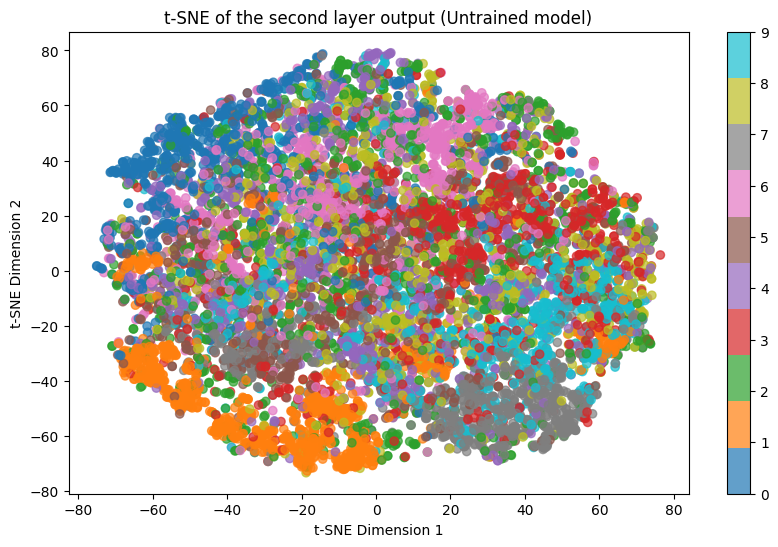

In [68]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(second_layer_tsne_untrained[:, 0], second_layer_tsne_untrained[:, 1], c=labels, cmap='tab10', alpha=0.7)
plt.colorbar(scatter)
plt.title('t-SNE of the second layer output (Untrained model)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


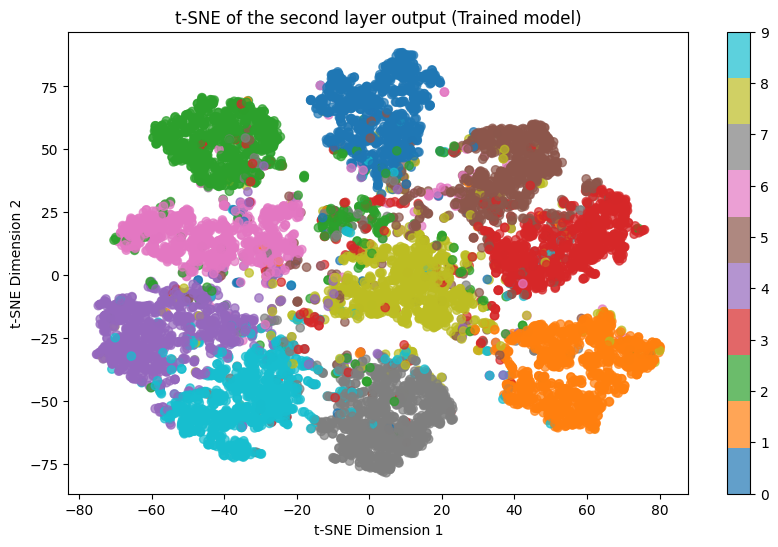

In [69]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(second_layer_tsne_trained[:, 0], second_layer_tsne_trained[:, 1], c=labels, cmap='tab10', alpha=0.7)
plt.colorbar(scatter)
plt.title('t-SNE of the second layer output (Trained model)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


**Q] Now, use the trained MLP to predict on the Fashion-MNIST dataset. What do you observe? How do the embeddings (t-SNE viz for the second layer compare for MNIST and Fashion-MNIST images)**

# Testing on Fashion MNIST Dataset

In [84]:
train_dataset_fashion = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_train.csv")
train_dataset_fashion.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [71]:
test_dataset_fashion = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_test.csv")
test_dataset_fashion

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


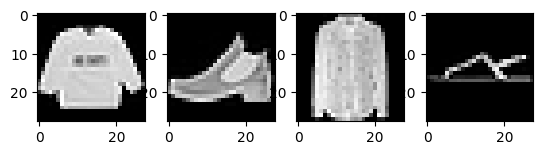

In [82]:
plt.subplot(1,4,1)
plt.imshow(train_dataset_fashion.iloc[0,1:].to_numpy().reshape(28,28) , cmap='gray')
plt.subplot(1,4,2)
plt.imshow(train_dataset_fashion.iloc[1,1:].to_numpy().reshape(28,28) , cmap='gray')
plt.subplot(1,4,3)
plt.imshow(train_dataset_fashion.iloc[2,1:].to_numpy().reshape(28,28) , cmap='gray')
plt.subplot(1,4,4)
plt.imshow(train_dataset_fashion.iloc[7,1:].to_numpy().reshape(28,28) , cmap='gray')
plt.show()

In [73]:
x_train_df_fashion = train_dataset_fashion.iloc[:,1:]
x_train_np_fashion = x_train_df_fashion.to_numpy()
x_train_tensor_fashion = torch.tensor(x_train_np_fashion,dtype=torch.float)
x_train_tensor_fashion

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [74]:
y_train_df_fashion = train_dataset_fashion.iloc[:,0]
y_train_df_encoded_fashion = pd.get_dummies(y_train_df_fashion)*1.0
display(y_train_df_encoded_fashion)
y_train_np_fashion = y_train_df_encoded_fashion.to_numpy()
y_train_tensor_fashion = torch.tensor(y_train_np_fashion,dtype=torch.float)
y_train_tensor_fashion

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
59996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


tensor([[0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.]])

In [75]:
x_test_df_fashion = test_dataset_fashion.iloc[:,1:]
x_test_np_fashion = x_test_df_fashion.to_numpy()
x_test_tensor_fashion = torch.tensor(x_test_np_fashion,dtype=torch.float)
x_test_tensor_fashion

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 1., 3.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [76]:
y_test_df_fashion = test_dataset_fashion.iloc[:,0]
y_test_df_encoded_fashion = pd.get_dummies(y_test_df_fashion)*1.0
display(y_test_df_encoded_fashion)
y_test_np_fashion = y_test_df_encoded_fashion.to_numpy()
y_test_tensor_fashion = torch.tensor(y_test_np_fashion,dtype=torch.float)
y_test_tensor_fashion

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.]])

In [77]:
logits_fashion = test_model(model_given,x_test_tensor_fashion)
labels = y_test_df_fashion
y_pred_fashion = nn.functional.softmax(logits_fashion, dim=1)
accuracy_fashion = accuracy(y_pred_fashion,labels)
f1score_fashion = fscore(y_pred_fashion,labels)
confusionMatrix = conf_matrix(y_pred_fashion,labels)
print(f"Accuracy on test data of fashion MNIST using trained MLP on MNIST: {accuracy_fashion*100}%")
print(f"f1 score on test data of fashion MNIST using trained MLP on MNIST: {f1score_fashion}")
print(confusionMatrix)

Accuracy on test data of fashion MNIST using trained MLP on MNIST: 3.16%
f1 score on test data of fashion MNIST using trained MLP on MNIST: 0.04445934311815614
[[  0   0   9  90   0   4   7 854  13  23]
 [  0   0 157  29   0   0   7 798   1   8]
 [  1   1  48 197   0   1   1 694   1  56]
 [  0   1  35  31   0   1  39 874   1  18]
 [  0   0  34  91   0   0  10 815   0  50]
 [  6   0 670  20  63 118  21  91   0  11]
 [  0   0  16  57   0   0   7 858   8  54]
 [  0   0 864  19  27   3   4  19  13  51]
 [  4   1 209  17   1   3   1 661  88  15]
 [  0   0 782  46   1  58   0 104   4   5]]


In [78]:
x_test_tensor_fashion = x_test_tensor_fashion.to(device)
second_layer_features_trained_fashion = extract_second_layer_features(model_given, x_test_tensor_fashion)

In [79]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
second_layer_tsne_trained_fashion = tsne.fit_transform(second_layer_features_trained_fashion.detach().cpu())
labels = y_test_df_fashion.to_numpy()

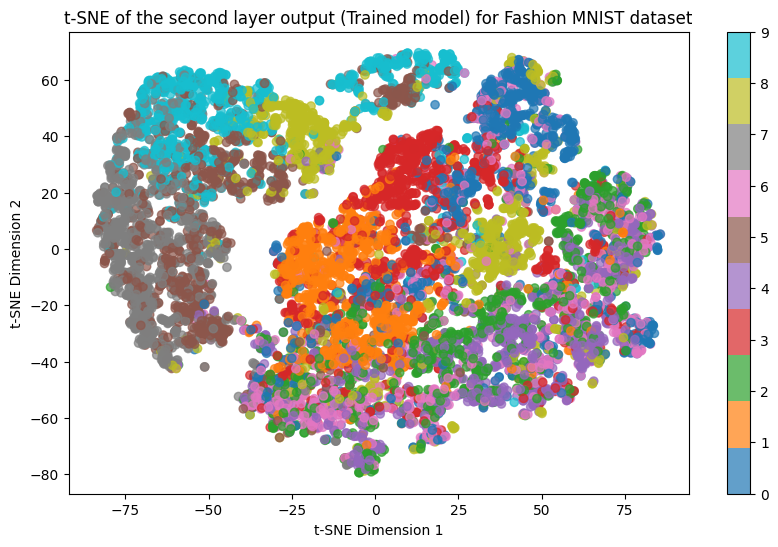

In [80]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(second_layer_tsne_trained_fashion[:, 0], second_layer_tsne_trained_fashion[:, 1], c=labels, cmap='tab10', alpha=0.7)
plt.colorbar(scatter)
plt.title('t-SNE of the second layer output (Trained model) for Fashion MNIST dataset')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()